In [1]:
# Хэрэгтэй санг суулгах
! pip install dynetx


[notice] A new release of pip is available: 24.3.1 -> 25.0.1
[notice] To update, run: pip install --upgrade pip


In [9]:
# сангуудаа импортолж ашиглахад бэлдэнэ
import dynetx as dn
import networkx as nx
import random
import matplotlib.pyplot as plt

# Сүлжээг унших функц
def read_net(filename):
  # Шинэ хоосон граф үүсгэнэ
  g = nx.Graph()
  # Файлыг уншиж оройнуудаар ирмэгийг үүсгэн g графд нэмнэ
  with open(filename) as f:
    f.readline()
    for l in f:
      l = l.split(",")
      g.add_edge(l[0], l[1])
  return g

# Динамик граф үүсгэнэ
g = dn.DynGraph()

In [10]:
# Хугацаааны 1-9 агшинд файлаас уншилт хийн снапшотуудыг хийнэ
for t in range(1, 9):
  er = read_net('../data/asoiaf-all-edges.csv')
  g.add_interactions_from(er.edges, t=t)


In [11]:
# Снапшотуудын id-г авна
g.temporal_snapshots_ids()

[1, 2, 3, 4, 5, 6, 7, 8]

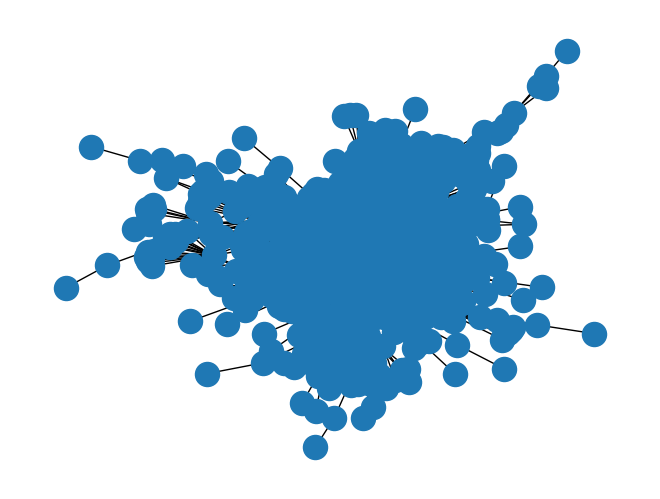

In [13]:
# Хугацааны 1 агшин дахь графыг авна
g1 = g.time_slice(1)
type(g1), g1.number_of_nodes(), g1.number_of_edges()
nx.draw(g1, with_labels=False)
plt.savefig('../results/asoiaf1.png')

In [6]:
# Хугацааны 0-с 3 хүртэлх хугацаан дахь графын утгуудыг авна
g0_3 = g.time_slice(0, 3)
type(g0_3), g0_3.number_of_nodes(), g0_3.number_of_edges(), g0_3.interactions_per_snapshots()

(dynetx.classes.dyngraph.DynGraph, 796, 2823, {1: 1411.5, 2: 1411.5})

In [10]:
# Динамик графыг статик графикд хувиргана
g1_flat = nx.Graph(g1.edges())

In [11]:
# Статик графын хэмжигдэхүүнүүдийг харуулах даа доорхуудыг хэрэглэж болно
type(g1_flat), g1_flat.number_of_nodes(), g1_flat.number_of_edges()

(networkx.classes.graph.Graph, 796, 2823)

In [12]:
# Дотоод тархалтыг судлахад хэрэглэнэ. Хугацааны 0 агшинд 5644 харилцан үйлчлэл байсан бол
# Хугацааны дараагийн 8 агшны интервалд 1 харилцан үйлчлэл байна.
r = g.inter_event_time_distribution()
print(f'Number interecations: temporal distance\t{r}')

Number interecations: temporal distance	{0: 5644, 8: 1}


In [13]:
# Нэг оройг онцлон тухайн оройн харилцан үйлчлэлийн тархалтыг судална
r = g.inter_event_time_distribution("Arya-Stark")
print(f'Number interactions: {r}')

Number interactions: {0: 166, 8: 1}


In [14]:
# 2 оройн харилцан үйлчлэлийн тархалтыг судалж болно. Оройнуудын нэрийг параметрээр өгнө
u = "Cersei-Lannister"
v = 'Jaime-Lannister'

r = g.inter_event_time_distribution(u, v)
print(f'Number interactions: {r}')

Number interactions: {7: 1}


In [15]:
# Хугацааны 2 агшин дахь заасан оройн зэргийг харуулна
g.degree(t=2)['Arya-Stark']

84

In [16]:
# g графын тархалт
g.coverage()

1.0

In [17]:
# Harwin-ий оройгийн тархалт
g.node_contribution('Harwin')

1.0

In [18]:
g.edge_contribution(u, v)

1.0

In [19]:
g.node_pair_uniformity(u, v)

1.0

In [20]:
g.density()

0.008921968332227173

In [21]:
g.node_density(u)

0.12185929648241206

In [ ]:
g.pair_density(u, v)

1.0

In [ ]:
for t in g.temporal_snapshots_ids():
  print(f'{t}\t{g.snapshot_density(t)}')

1	0.008921968332227173
2	0.008921968332227173
3	0.008921968332227173
4	0.008921968332227173
5	0.008921968332227173
6	0.008921968332227173
7	0.008921968332227173
8	0.008921968332227173


In [ ]:
import dynetx.algorithms as al
paths = al.time_respecting_paths(g, "Gendry", 'Grey-Worm', start = 1, end = 5)

In [ ]:
p = paths[0]
p